In [22]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [23]:
%cd gdrive/My Drive/

[Errno 2] No such file or directory: 'gdrive/My Drive/'
/content/gdrive/My Drive/proyecto


In [24]:
%pwd
%mkdir proyecto

In [25]:

%cd ./proyecto/

/content/gdrive/My Drive/proyecto/proyecto


In [26]:
%pwd

'/content/gdrive/My Drive/proyecto/proyecto'

In [40]:
!pip install pyts

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.decomposition import SingularSpectrumAnalysis
import scipy.io as sc
from scipy.signal import freqz


In [42]:
%pwd


'/content/gdrive/My Drive/proyecto/proyecto'

In [30]:
%ls

In [31]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butter_lowpass(cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)    
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y
def butter_lowpass_bode (b ,a):
    angularFreq, freqResponse, phaseResponse = scipy.signal.bode(scipy.signal.lti(b, a))

    return angularFreq, freqResponse, phaseResponse


muestreo 100


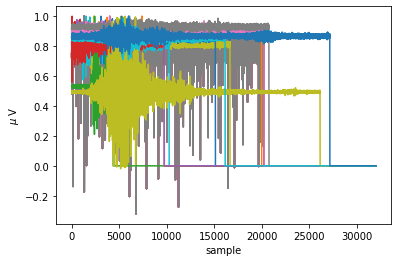

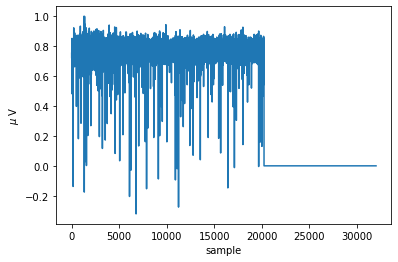

[0.75251743 0.77226956 0.74244771 0.75174284 0.71920991 0.7788536
 0.7788536  0.71959721 0.72811774 0.77575523 0.78969791 0.73392719
 0.70681642 0.80906274 0.84546863 0.78156468 0.70410534 0.48218435
 0.74632068 0.767622   0.75019365 0.74864446 0.83384973 0.81487219
 0.74670798 0.72966692 0.75058095 0.75832688 0.79473277 0.72463207
 0.78543765 0.80557707 0.80131681 0.72734314 0.72540666 0.74941905
 0.85205267 0.76065066 0.73934934 0.767622   0.79473277 0.75948877
 0.72695585 0.73702556 0.71533695 0.79628195 0.80480248 0.78233927
 0.72811774 0.8020914  0.79628195 0.73392719 0.75832688 0.77769171
 0.81680868 0.83656081 0.71959721 0.75445391 0.73973664 0.7908598
 0.75406662 0.7443842  0.77381875 0.83268784 0.76413633 0.73121611
 0.74167312 0.70604183 0.76336174 0.76219985 0.7087529  0.78621224
 0.78195198 0.74670798 0.75871418 0.74632068 0.75948877 0.732378
 0.72695585 0.74670798]


In [32]:
#Tele
data_tele = sc.loadmat('/content/gdrive/My Drive/proyecto/sisTele.mat')
data_tele.keys() # variables del diccionario

Y_tele = data_tele['Y']
fs_tele = data_tele['fs']
fs_tele = fs_tele[0][0]
print("muestreo",fs_tele)


plt.plot(Y_tele.T) #se le hace transpuesta
plt.xlabel('sample')
plt.ylabel('$\mu$ V')
plt.show()
sampleSignal = Y_tele[3,:] # se extrae una señal de la base de datos
plt.figure
plt.plot(sampleSignal)
yy = sampleSignal
plt.xlabel('sample')
plt.ylabel('$\mu$ V')
plt.show()

print(sampleSignal[:80])
#regional 

data_reg = sc.loadmat('/content/gdrive/My Drive/proyecto/sisReg.mat')
data_reg.keys() # variables del diccionario

Y_reg = data_reg['Y']
fs_reg = data_reg['fs']

#Local


data_loc = sc.loadmat('/content/gdrive/My Drive/proyecto/sisLoc.mat')
data_loc.keys() # variables del diccionario

Y_loc = data_loc['Y']
fs_loc = data_loc['fs']

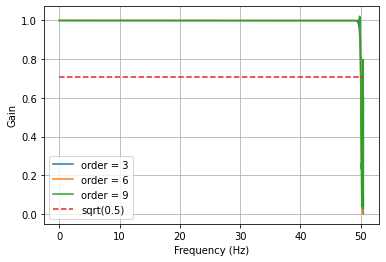

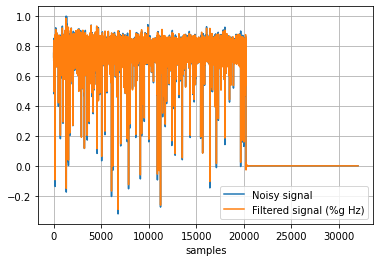

In [33]:
fs = fs_tele + 1
lowcut = 1.0
highcut = 50
cutOff = 50

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
for order in [3, 6, 9]:
  b, a = butter_lowpass(cutOff, fs, order)
  w, h = freqz(b, a, worN=2000)
  plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
             '--', label='sqrt(0.5)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

plt.figure(2)
plt.clf()
plt.plot(yy, label='Noisy signal')


y = butter_lowpass_filter(yy,cutOff, fs, order=3)
plt.plot(y, label='Filtered signal (%g Hz)' )
plt.xlabel('samples')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='lower right')

plt.show()

In [34]:
zeos = np.zeros((2,3))
print(zeos)
zeos[0] = [1,2,3]
print(zeos)

[[0. 0. 0.]
 [0. 0. 0.]]
[[1. 2. 3.]
 [0. 0. 0.]]


In [46]:
Y_tele.shape[0]


21

In [36]:
x = len(y)-len(yy)
a = len(y) - x
y = y[:32000]


Aqui hare el filtro a las señales del tele sismo

0
[0.65410105 0.74592807 0.7379475  0.79635105 0.69384128 0.72843895
 0.72453169 0.78454714 0.68400893 0.72450384]
1
[0.82165134 0.88777224 0.80072371 0.8676695  0.80190938 0.88405927
 0.83732395 0.88630804 0.78961849 0.87610861]
2
[0.52961525 0.51589317 0.48147409 0.57072149 0.44556066 0.55639828
 0.49512786 0.4958614  0.5572501  0.52336366]
3
[0.52961525 0.51589317 0.48147409 0.57072149 0.44556066 0.55639828
 0.49512786 0.4958614  0.5572501  0.52336366]
4
[0.80555487 0.88200728 0.80894267 0.87031283 0.80079185 0.86326015
 0.82288837 0.87107584 0.83251965 0.85441351]
5
[0.63288608 0.65282925 0.58451232 0.68161434 0.60211963 0.67848475
 0.5909068  0.70652169 0.60218232 0.64693083]
6
[0.71402696 0.85525284 0.77453335 0.78322345 0.79526771 0.81411093
 0.74614478 0.81541008 0.74084859 0.8376779 ]
7
[0.83831181 0.89855711 0.8150459  0.93358809 0.80401572 0.93546735
 0.83687402 0.89225267 0.86030723 0.88904181]
8
[0.84163435 0.92873266 0.84944749 0.94870639 0.83947075 0.91524465
 0.8333392 

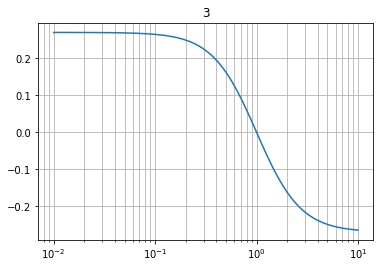

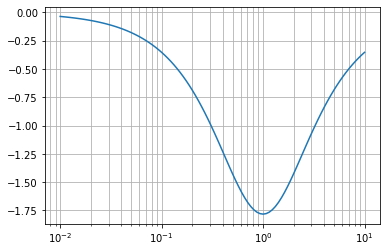

<Figure size 720x360 with 0 Axes>

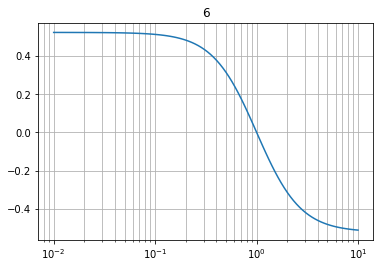

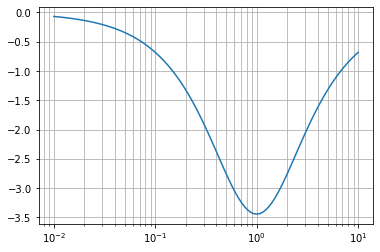

<Figure size 720x360 with 0 Axes>

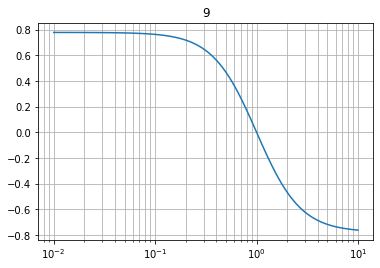

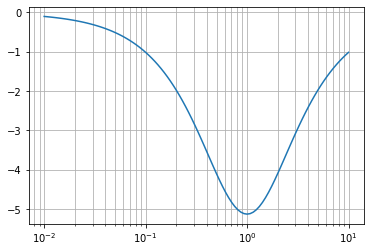

<Figure size 720x360 with 0 Axes>

In [51]:
import scipy.signal 

#matrices vacias
signalFilteredTele = np.zeros((Y_tele.shape[0],Y_tele.shape[1]))
signalFilteredLoc = np.zeros((Y_loc.shape[0],Y_loc.shape[1]))
signalFilteredReg = np.zeros((Y_reg.shape[0],Y_reg.shape[1]))

fs = fs_tele + 1
cutOff = 50
order = 6

for i in [3,6,9]: # diagramas de bode
  b, a = butter_lowpass(cutOff, fs, order=i)
  angularFreq, freqResponse, phaseResponse = scipy.signal.bode(scipy.signal.lti(b, a))
  plt.figure(i)
  plt.semilogx(angularFreq, freqResponse)
  plt.grid(True, which = "both")
  plt.title(i)
  plt.figure(i+1)
  plt.semilogx(angularFreq, phaseResponse)
  plt.grid(True, which = "both")

  plt.figure(figsize=(10,5))
  
for j in range (0,Y_tele.shape[0]): # señales filtradas
  signalFilteredTele[j,:] = butter_lowpass_filter(Y_tele[j,:], cutOff, fs, order=6)
  signalFilteredReg[j,:] = butter_lowpass_filter(Y_reg[j,:], cutOff, fs, order=6)
  signalFilteredLoc[j,:] = butter_lowpass_filter(Y_loc[j,:], cutOff, fs, order=6)
  print(j)
  print(signalFilteredLoc[j,:10])